
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 


Using TensorFlow backend.


In [2]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
 
model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1149010


In [4]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
__________

In [5]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)

In [6]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_loss_acc(history, title):
    # print(history.history)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Plot training & validation accuracy values
    ax1.plot(history.history['acc'], label="train_acc")
    ax1.plot(history.history['val_acc'], label="val_acc")
    ax1.set_title(title)
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(loc='upper left')    

    # Plot training & validation loss values
    ax2.plot(history.history['loss'], label="train_loss")
    ax2.plot(history.history['val_loss'], label="val_loss")    
    ax2.set_title(title)
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc='upper left')
    plt.show()

Instructions for updating:
Use tf.cast instead.


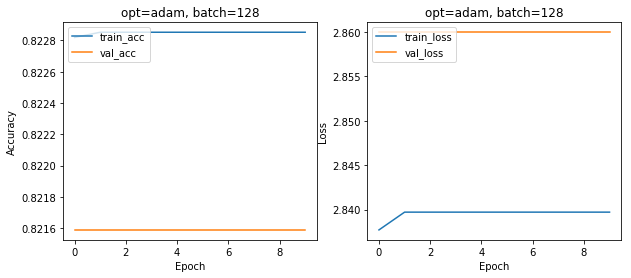

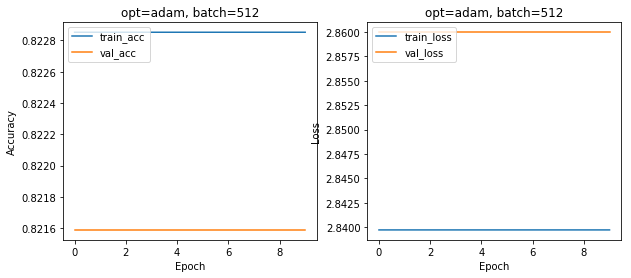

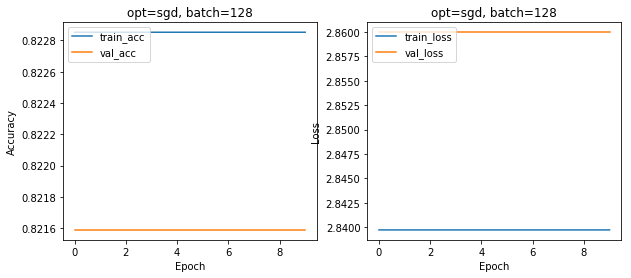

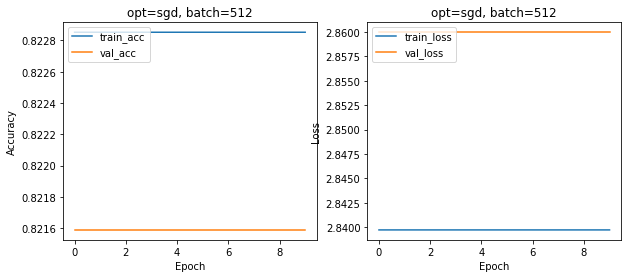

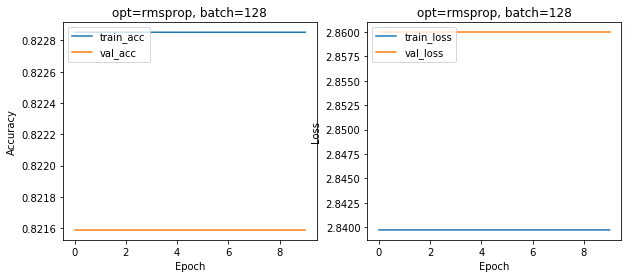

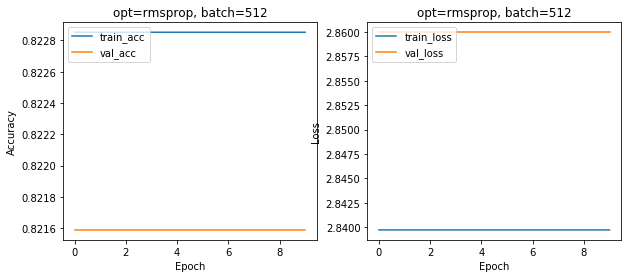

In [8]:
opt_list = ['adam', 'sgd', 'rmsprop']
batch_size_list = [128, 512]

for opt in opt_list:
    for batch in batch_size_list:
        model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
        # history = model.fit(X_train, Y_train, batch_size=batch, epochs=20, shuffle=True, verbose=2, validation_split=0.3)
        history = model.fit(X_train, Y_train, batch_size=batch, epochs=10, shuffle=True, verbose=0, validation_split=0.3)
        title = "opt=%s, batch=%d" % (opt, batch)
        plot_loss_acc(history, title)